### 꽃집데이터 분석

서울 열린데이터 광장에 있는 서울시 사업체조사결과 정보 (2017년) 를 이용한 서울 시내 꽃집에 관해 분석해보았습니다.

데이터 출처 : https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15559&srvType=F&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('data/raw_data.csv')

In [58]:
df.head()

,행정구역코드,대표자성별,대표자연령대,창업년도,창업월,조직형태코드,사업체구분코드,주산업산업분류코드,자영업자합계,자영업자남,...,상용근로자여,임시및일용근로자합계,임시및일용근로자남,임시및일용근로자여,기타종사자합계,기타종사자남,기타종사자여,종사자합계,종사자수남,종사자수여
0,1121078,1,6,2006,9,1,1,46417,1.0,1.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,1.0,0.0
1,1118054,1,5,2005,5,1,1,68221,1.0,1.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,1.0,0.0
2,1114066,1,5,2001,12,2,2,47919,NaN,NaN,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,30,8.0,22.0
3,1125066,2,6,2007,10,1,1,91223,1.0,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,1.0
4,1121080,1,4,2015,7,1,1,90212,1.0,1.0,...,1.0,0.0,NaN,NaN,0.0,NaN,NaN,2,1.0,1.0


전체 data 길이를 확인해본다. 총 822863개 이다.

In [59]:
len(df)

822863

필드별 null data 비율을 확인해본다.

In [60]:
df.isnull().sum() / len(df)

행정구역코드        0.000000
대표자성별         0.000000
대표자연령대        0.000000
창업년도          0.000000
창업월           0.000000
조직형태코드        0.000000
사업체구분코드       0.000000
주산업산업분류코드     0.000000
자영업자합계        0.035191
자영업자남         0.518301
자영업자여         0.598785
무급가족종사자합계     0.183716
무급가족종사자남      0.935914
무급가족종사자여      0.911758
상용근로자합계       0.130164
상용근로자남        0.657496
상용근로자여        0.663617
임시및일용근로자합계    0.153486
임시및일용근로자남     0.904641
임시및일용근로자여     0.864573
기타종사자합계       0.189109
기타종사자남        0.978935
기타종사자여        0.976628
종사자합계         0.000000
종사자수남         0.010959
종사자수여         0.016567
dtype: float64

꽃집에 대한 것만 알아볼 예정이기에, 주산업분류코드 가 47851 (화초 및 식물 소매업) 인 데이터만 추출해본다.
산업분류코드는 위 데이터 출처에 별도로 첨부되어 있다. 개수는 총 3108 이다.

In [61]:
df.loc[ df['주산업산업분류코드']==47851 ].count()

행정구역코드        3108
대표자성별         3108
대표자연령대        3108
창업년도          3108
창업월           3108
조직형태코드        3108
사업체구분코드       3108
주산업산업분류코드     3108
자영업자합계        3091
자영업자남          903
자영업자여         2153
무급가족종사자합계     2916
무급가족종사자남       201
무급가족종사자여       375
상용근로자합계       2972
상용근로자남         166
상용근로자여         335
임시및일용근로자합계    2966
임시및일용근로자남       60
임시및일용근로자여      201
기타종사자합계       2895
기타종사자남          17
기타종사자여          19
종사자합계         3108
종사자수남         3006
종사자수여         3075
dtype: int64

#### 1. 대표자 성별과 연령대¶

In [62]:
df_flower = df.loc[ df['주산업산업분류코드']==47851 ]

대표자 성별과 연령대를 살펴보겠다.   
데이터 출처에 첨부된 필드 설명에 따라 성별은 "1":남, "2":여 이며,  
연령대는 "1":10대, "2":20대, …, "9":90대 이다.  

In [63]:
df_flower['대표자성별'].value_counts() 

2    2177
1     931
Name: 대표자성별, dtype: int64

In [64]:
df_flower['대표자성별'].value_counts() / len(df_flower)

2    0.70045
1    0.29955
Name: 대표자성별, dtype: float64

대표자 성별은 70% 가 여성, 30% 가 남성이다.

In [65]:
df_flower['대표자연령대'].value_counts() 

5    947
4    650
6    580
3    567
7    192
2    157
8     14
1      1
Name: 대표자연령대, dtype: int64

In [66]:
df_flower['대표자연령대'].value_counts() / len(df_flower)

5    0.304698
4    0.209138
6    0.186615
3    0.182432
7    0.061776
2    0.050515
8    0.004505
1    0.000322
Name: 대표자연령대, dtype: float64

대표자 연령대는 50 대가 30%, 40대가 20%, 60 대, 30 대가 약 18% 정도이다.

#### 2. 창업연도와 그에 따른 대표자 연령대

In [67]:
df_flower['창업년도'].value_counts() 

2017    325
2016    318
2010    247
2015    223
2014    181
2013    146
2012    113
2002    107
2009    104
2006    103
2011     99
2008     97
2000     87
2001     83
2005     83
2007     81
2003     79
1999     72
2004     66
1997     62
1996     55
1998     50
1991     46
1994     41
1995     39
1993     28
1988     24
1989     22
1987     22
1985     18
1992     15
1990     14
1986     10
1983     10
1984      8
1981      7
1977      5
1980      4
1972      3
1978      3
1979      2
1971      2
1974      1
1976      1
1973      1
1982      1
Name: 창업년도, dtype: int64

2015-2017년에 창업된 꽃집은 약 28% 이다.
최근에 창업된 꽃집이 전체의 약 1/3 못 미친다고 볼 수 있겠다. 꽤 높은 비율이라고 생각한다.

In [68]:
len(df_flower.loc[ (df_flower['창업년도'] == 2017 ) | (df_flower['창업년도'] == 2016 ) | (df_flower['창업년도'] == 2015 ) ] ) \
/ len(df_flower)

0.27863577863577865

2012-2014년에 창업된 꽃집은 약 14% 이다.

In [69]:
len(df_flower.loc[ (df_flower['창업년도'] == 2012 ) | (df_flower['창업년도'] == 2013 ) | (df_flower['창업년도'] == 2014 ) ] ) \
/ len(df_flower)

0.14157014157014158

최근 6년간 창업된 꽃집이 전체의 42% 이다. 
오래 사업을 이어가는 비율이 적다고 생각할 수도 있겠다. 

In [70]:
len(df_flower.loc[ (df_flower['창업년도'] <= 2008 ) ] ) / len(df_flower)

0.435006435006435

최근 6년간 창업된 꽃집의 대표자 연령대를 살펴보겠다.

In [71]:
df_flower.loc[ (df_flower['창업년도'] >= 2012 ) ]['대표자연령대'].value_counts() 

3    471
4    296
5    266
2    152
6     98
7     19
8      3
1      1
Name: 대표자연령대, dtype: int64

In [72]:
df_flower.loc[ (df_flower['창업년도'] >= 2012 ) ]['대표자연령대'].value_counts()  / len(df_flower.loc[ (df_flower['창업년도'] >= 2012 ) ])

3    0.360643
4    0.226646
5    0.203675
2    0.116386
6    0.075038
7    0.014548
8    0.002297
1    0.000766
Name: 대표자연령대, dtype: float64

최근 6년간 창업된 꽃집은 약 42%이며,, 이들의 대표자 연령대는 30대가 36%, 40대가 23% 를 차지한다.  
10년 이상 사업을 이어가는 꽃집(2008년도 포함 그 이전 창업)은 약 43% 이다.  
10년 이상 창업을 이어가는 꽃집의 대표자 연령대를 살펴보자.  

In [73]:
df_flower.loc[ (df_flower['창업년도'] <= 2008 ) ]['대표자연령대'].value_counts() 

5    552
6    381
4    240
7    127
3     39
8     10
2      3
Name: 대표자연령대, dtype: int64

In [74]:
df_flower.loc[ (df_flower['창업년도']<= 2008 ) ]['대표자연령대'].value_counts()  / len(df_flower.loc[ (df_flower['창업년도'] <= 2008 ) ])

5    0.408284
6    0.281805
4    0.177515
7    0.093935
3    0.028846
8    0.007396
2    0.002219
Name: 대표자연령대, dtype: float64

10년 이상 사업을 이어가는 꽃집(2008년도 포함 그 이전 창업)은 약 43% 이며, 이들의 대표자 연령대는 50대가 41%, 60대가 28%이다.

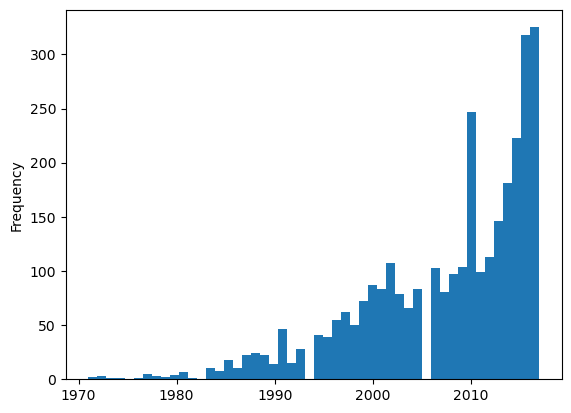

In [75]:
df_flower["창업년도"].plot.hist(bins=50)
plt.show()

#### 3. 조직 형태와 사업체 구분 코드

조직형태코드   
"1":개인사업체, "2":회사법인, "3":회사이외법인, "4":비법인단체, "5":국가,지방자치단체

In [76]:
df_flower['조직형태코드'].value_counts() 

1    3041
2      57
3      10
Name: 조직형태코드, dtype: int64

조직형태코드는 개인사업체 형태(1) 가 압도적으로 많다.

사업체구분코드  
"1":단독사업체, "2":본사,본점 등, "3":공장, 지사(점),영업소 등

In [77]:
df_flower['사업체구분코드'].value_counts() 

1    3087
3      16
2       5
Name: 사업체구분코드, dtype: int64

사업체구분코드는 단독사업체(1) 가 압도적으로 많다.  
결론적으로 주산업분류코드 가 47851 (화초 및 식물 소매업)은, 개인사업체이며, 단독사업체 형태가 압도적으로 많다.

#### 4. 종사자 수

다음은 2017년 기준 사업체조사 조사표에 있는 내용이다.  
종 사 자 수 (단위 : 명)  


•자영업자 : 개인사업체를 소유하며 자신의 책임하에 직접 경영하는 자 (※ 법인사업체의 대표자는 자영업자가 아님)  

•무급가족종사자 : 자영업자의 가족이나 친인척으로서 임금을 받지 않고 해당 사업체 정규 근로시간의 1/3이상 종사하는 자  

•상용근로자 : 고용계약기간이 1년 이상인 근로자 또는 고용계약기간이 정해지지 않고 정규직원으로 일하는 자로서 사업체에서 급여를 지급하는 자  

•임시 및 일용근로자 : 고용계약기간이 1년 미만인 근로자로서 사업체에서 급여를 지급하는 자  

•기타종사자 : 1) 기본급 등 일정한 급여 없이 주로 실적에 따라 수수료 또는 봉사료 등을 사업체에 지급하는 자 (개인사업등록자라도 지사, 영업소 등에 소속되어 있는 자는 영업소 등의 기타종사자로 조사)  
2) 그 외 기타 종사자  

In [78]:
 df_flower['자영업자합계'].value_counts() 

1.0    3029
0.0      50
2.0      12
Name: 자영업자합계, dtype: int64

1인 자영업자 가 3108개 사업체중 3029개로 압도적으로 많다. (3% 의 null 데이터는 고려하지 않음)

In [79]:
df_flower['상용근로자합계'].value_counts() 

0.0     2573
1.0      219
2.0       98
3.0       38
4.0       20
6.0        8
5.0        6
7.0        3
8.0        1
22.0       1
9.0        1
13.0       1
12.0       1
14.0       1
47.0       1
Name: 상용근로자합계, dtype: int64

상용근로자가 없는 사업체가 압도적으로 많다. (3108개 사업체중 2573 개. 13% 의 null 데이터는 고려하지 않음)

In [80]:
df_flower['종사자합계'].value_counts()

1     2096
2      686
3      200
4       70
5       22
6       16
7        9
9        3
13       2
8        1
22       1
25       1
47       1
Name: 종사자합계, dtype: int64

In [81]:
df_flower.loc[df_flower['종사자합계'] ==1 ]['종사자수여'].value_counts()

1.0    1615
0.0     458
Name: 종사자수여, dtype: int64

In [82]:
df_flower.loc[df_flower['종사자합계'] ==1 ]['종사자수남'].value_counts()

0.0    1571
1.0     481
Name: 종사자수남, dtype: int64

종사자합계가 1명인 사업체가 가장 많으며, 이들 중 여성이 높은 비율을 차지하고 있다.   

결론 : 1명이 종사하는 사업체가 가장 많으며, 이들 중 여성이 높은 비율을 차지하고 있다.   

사업체 형태로는 1인 자영업자가 많다.

#### 5. 행정구역

아래는 행정구역 table 과 위의 데이터를 붙이기 위한 과정!

In [83]:
df_dong = pd.read_csv('data/dong_field.csv')

In [84]:
df_dong.head()

,Unnamed: 0,대분류,시도,중분류,시군구,소분류,읍면동,영문 표기,한자 표기
0,NaN,11.0,서울특별시,NaN,NaN,NaN,NaN,Seoul,서울特別市
1,NaN,11.0,서울특별시,11010.0,종로구,NaN,NaN,Jongno-gu,鍾路區
2,NaN,11.0,서울특별시,11010.0,종로구,1101053.0,사직동,Sajik-dong,社稷洞
3,NaN,11.0,서울특별시,11010.0,종로구,1101054.0,삼청동,Samcheong-dong,三淸洞
4,NaN,11.0,서울특별시,11010.0,종로구,1101055.0,부암동,Buam-dong,付岩洞


In [85]:
df_dong.drop(['Unnamed: 0', '한자 표기'], axis=1, inplace = True )

In [86]:
df_dong.head()

,대분류,시도,중분류,시군구,소분류,읍면동,영문 표기
0,11.0,서울특별시,NaN,NaN,NaN,NaN,Seoul
1,11.0,서울특별시,11010.0,종로구,NaN,NaN,Jongno-gu
2,11.0,서울특별시,11010.0,종로구,1101053.0,사직동,Sajik-dong
3,11.0,서울특별시,11010.0,종로구,1101054.0,삼청동,Samcheong-dong
4,11.0,서울특별시,11010.0,종로구,1101055.0,부암동,Buam-dong


In [87]:
df_dong.소분류.dtypes

dtype('float64')

In [88]:
df_flower.행정구역코드.dtypes

dtype('int64')

In [89]:
df_dong['소분류'].fillna(-1, inplace = True)

In [90]:
df_dong['소분류'] = df_dong['소분류'].astype('int64')

In [91]:
df_dong['소분류'].head()

0         -1
1         -1
2    1101053
3    1101054
4    1101055
Name: 소분류, dtype: int64

In [92]:
df_total = pd.merge(df_flower, df_dong, left_on='행정구역코드', right_on='소분류')

In [93]:
df_total.head()

,행정구역코드,대표자성별,대표자연령대,창업년도,창업월,조직형태코드,사업체구분코드,주산업산업분류코드,자영업자합계,자영업자남,...,종사자합계,종사자수남,종사자수여,대분류,시도,중분류,시군구,소분류,읍면동,영문 표기
0,1102068,2,5,2015,3,1,1,47851,1.0,NaN,...,3,0.0,3.0,11.0,서울특별시,11020.0,중구,1102068,중림동,Jungnim-dong
1,1102068,2,5,2010,9,1,1,47851,1.0,NaN,...,1,0.0,1.0,11.0,서울특별시,11020.0,중구,1102068,중림동,Jungnim-dong
2,1102068,1,6,2014,9,1,1,47851,1.0,1.0,...,2,1.0,1.0,11.0,서울특별시,11020.0,중구,1102068,중림동,Jungnim-dong
3,1102068,1,6,2013,3,1,1,47851,1.0,1.0,...,2,1.0,1.0,11.0,서울특별시,11020.0,중구,1102068,중림동,Jungnim-dong
4,1102068,1,5,2015,11,1,1,47851,1.0,1.0,...,2,1.0,1.0,11.0,서울특별시,11020.0,중구,1102068,중림동,Jungnim-dong


In [94]:
df_total['시도'].unique()

array(['서울특별시'], dtype=object)

서울시내 구별, 꽃집 개수를 살펴보자

In [95]:
df_total['시군구'].value_counts()

서초구     505
강남구     334
종로구     243
중구      189
송파구     176
마포구     166
강동구     164
영등포구    153
강서구     112
용산구     106
양천구      89
성북구      87
광진구      74
노원구      74
서대문구     70
구로구      70
관악구      69
동대문구     65
성동구      62
동작구      57
중랑구      54
은평구      52
강북구      51
도봉구      47
금천구      39
Name: 시군구, dtype: int64

서울시내 상위 TOP8 의 구별 분포를 보면, 크게 위치적으로 3권역  
1) 서초,강남, 송파구, 강동구 (38%)  
2) 종로구,중구 (14%)  
3) 마포, 영등포구 (10% ) 로 나뉜다고 볼 수 있다.  

In [96]:
df_total['읍면동'].value_counts().head(15)

양재2동           219
종로5·6가동        124
광희동            101
반포4동            66
역삼1동            63
영등포동            39
여의동             39
서교동             38
논현2동            34
종로1·2·3·4가동     32
서초1동            32
길동              32
압구정동            29
오륜동             29
신사동             28
Name: 읍면동, dtype: int64

상위 15개동의 꽃집 수는 위와 같다.

In [97]:
df_total.loc[ (df_total['시군구']=='서초구') | (df_total['시군구']=='강남구')]['대표자연령대'].value_counts()

5    230
4    199
3    165
6    155
7     52
2     35
8      2
1      1
Name: 대표자연령대, dtype: int64

In [98]:
df_total.loc[ (df_total['시군구']=='서초구') | (df_total['시군구']=='강남구')] \
.loc[ (df_total['창업년도'] >= 2012 ) ]['대표자연령대'].value_counts() 

3    138
4     82
5     57
2     35
6     26
7      3
1      1
Name: 대표자연령대, dtype: int64

서초구, 강남구에서 대표자 연령대는 5 -> 4 -> 3 십대 순이며, 2012년 이후 창업 비율은 3 -> 4 십대 순이다.

In [99]:
df_total.loc[ (df_total['시군구']=='송파구') | (df_total['시군구']=='강동구')]['대표자연령대'].value_counts()

5    116
4     66
6     59
3     56
2     30
7      9
8      4
Name: 대표자연령대, dtype: int64

In [100]:
df_total.loc[ (df_total['시군구']=='송파구') | (df_total['시군구']=='강동구')] \
.loc[ (df_total['창업년도'] >= 2012 ) ]['대표자연령대'].value_counts() 

3    49
5    44
4    32
2    28
6    13
7     1
Name: 대표자연령대, dtype: int64

송파구, 강동구에서 대표자 연령대는 5 -> 4 -> 6 십대 순이며, 2012년 이후 창업 비율은 3 -> 5 십대 순이다.

In [101]:
df_total.loc[ (df_total['시군구']=='마포구') | (df_total['시군구']=='영등포구')]['대표자연령대'].value_counts()

3    89
5    79
4    64
6    59
2    20
7     7
8     1
Name: 대표자연령대, dtype: int64

In [102]:
df_total.loc[ (df_total['시군구']=='마포구') | (df_total['시군구']=='영등포구')] \
.loc[ (df_total['창업년도'] >= 2012 ) ]['대표자연령대'].value_counts() 

3    75
4    32
5    24
2    19
6     8
7     2
Name: 대표자연령대, dtype: int64

마포구, 영등포구에서 대표자 연령대는 3 -> 5 -> 4 십대 순이며, 2012년 이후 창업 비율은 3 -> 5 십대 순이다.

#### 6. 결론

1. 서울시내 (화초 및 식물 소매업) 으로 등록된 사업체는 총 3108개 이다.  
2. 대표자 성별은 70% 가 여성, 30% 가 남성이다.  
3. 대표자 연령대는 50 대가 30%, 40대가 20%, 60 대, 30 대가 약 18% 정도이다.  
4. 조직형태코드는 개인사업체 형태(1) 가 압도적으로 많다.  
사업체구분코드는 단독사업체(1) 가 압도적으로 많다.  
결론적으로 주산업분류코드 가 47851 (화초 및 식물 소매업)은, 개인사업체이며, 단독사업체 형태가 압도적으로 많다.  
5. 1인 자영업자 가 3108개 사업체중 3029개로 압도적으로 많다.  
상용근로자가 없는 사업체가 압도적으로 많다.  
종사자합계가 1명인 사업체가 가장 많으며, 이들 중 여성이 높은 비율을 차지하고 있다.  
6. 서울시내 상위 TOP8 의 구별 분포를 보면, 크게 위치적으로 3권역 으로 나눌 수 있다.  
 1_서초,강남, 송파구, 강동구 (38%)  
 2_종로구,중구 (14%)  
 3_마포, 영등포구 (10% )  
서초구, 강남구에서 대표자 연령대는 5 -> 4 -> 3 십대 순이며, 2012년 이후 창업 비율은 3 -> 4 십대 순이다.  
송파구, 강동구에서 대표자 연령대는 5 -> 4 -> 6 십대 순이며, 2012년 이후 창업 비율은 3 -> 5 십대 순이다.  
마포구, 영등포구에서 대표자 연령대는 3 -> 5 -> 4 십대 순이며, 2012년 이후 창업 비율은 3 -> 5 십대 순이다.  